## Problem Statement

The objective of this project is to build a regression model that can accurately predict house prices based on various property features such as area, number of bedrooms and bathrooms, location, condition, and others. This helps understand which factors contribute most to house pricing and can assist buyers/sellers in making informed decisions.


In [134]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
data = pd.read_csv("House Price Prediction Dataset.csv")
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


## Data Preprocessing

We clean and prepare the dataset by:
- Encoding categorical variables using one-hot encoding
- Scaling numerical features like area


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [159]:
print(data.isnull().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [ ]:
# Droping ID column
data.drop('Id', axis=1, inplace=True)

# Taking out house age by subtracting the year from 2025
data['HouseAge'] = 2025 - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

# Encoding categorical features
label_cols = ['Location', 'Condition', 'Garage']
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# Scaling area
scaler = MinMaxScaler()
data[['Area', 'HouseAge']] = scaler.fit_transform(data[['Area', 'HouseAge']])
data

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price,HouseAge
0,0.190974,5,4,3,0,0,0,149919,0.430894
1,0.838373,5,4,3,0,0,0,424998,0.528455
2,0.687194,2,2,3,0,2,0,266746,0.691057
3,0.103379,4,2,2,2,1,1,244020,0.983740
4,0.983771,1,4,2,0,1,1,636056,0.390244
...,...,...,...,...,...,...,...,...,...
1995,0.998888,5,4,3,2,3,0,295620,0.813008
1996,0.565807,5,2,1,2,3,1,580929,0.032520
1997,0.124722,5,1,2,1,3,0,476925,0.975610
1998,0.791685,3,1,2,3,0,1,161119,0.707317


## Data Exploration

We visualize the dataset to identify trends, distributions, and relationships between features and the target variable.


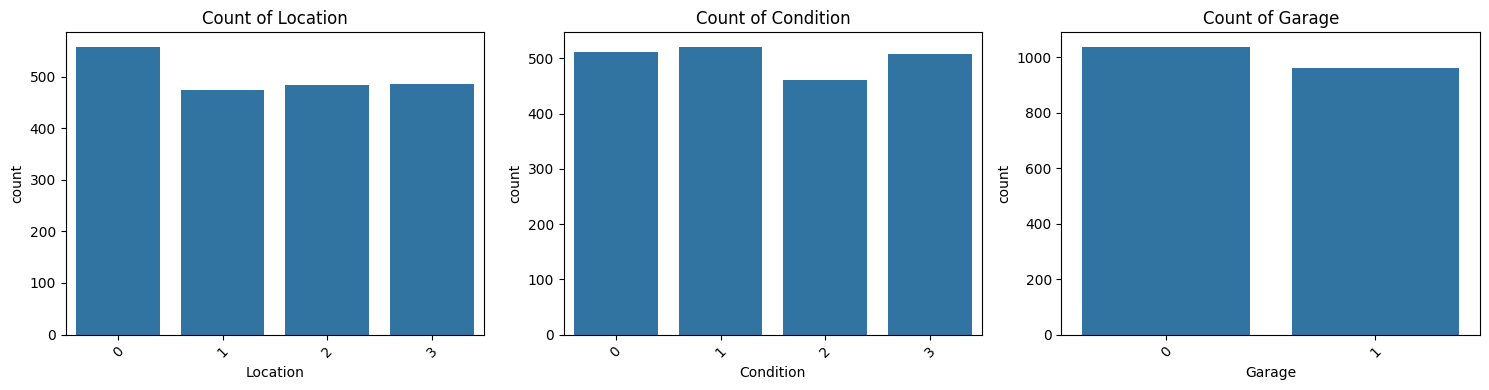

In [161]:
# Count plots for each categorical column
plt.figure(figsize=(15, 4))
for i, col in enumerate(label_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


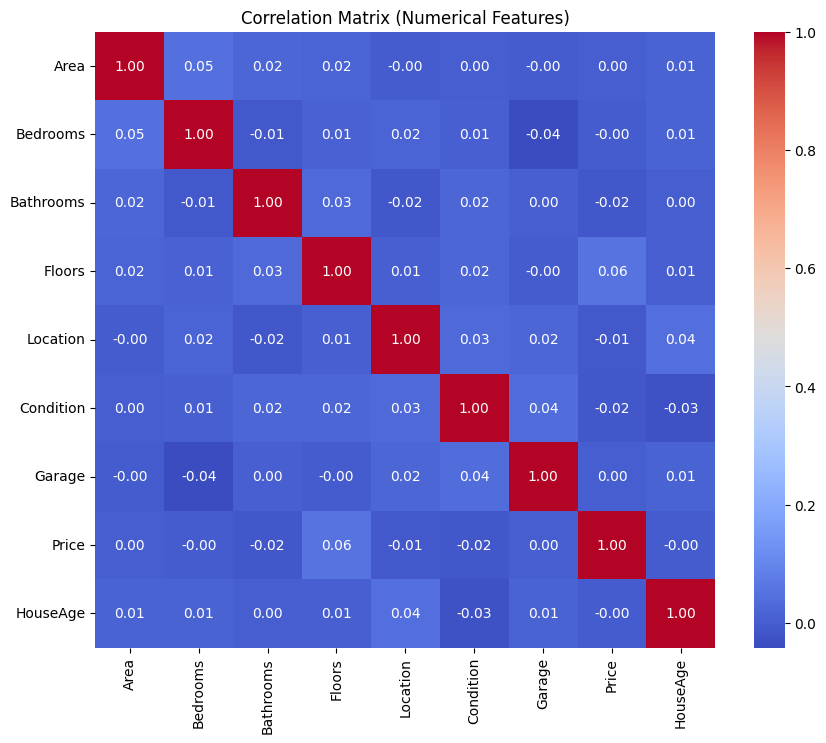

In [162]:
# Select numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


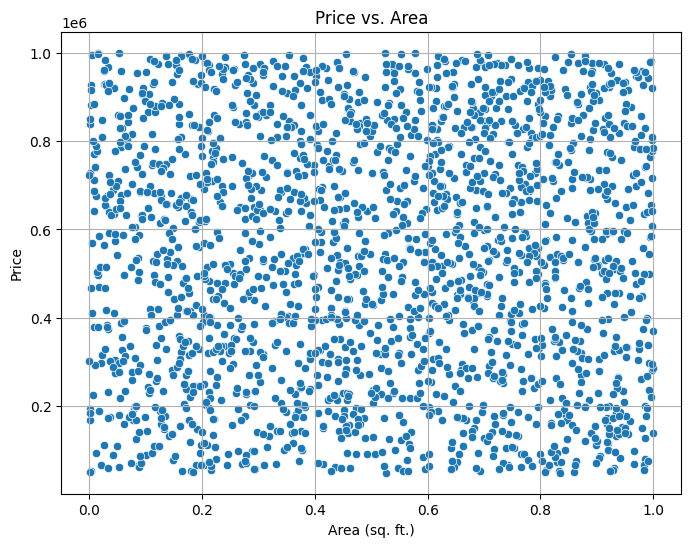

In [ ]:
# Scattar Plot to assess the relationship between Area and Target variable Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Area', y='Price', data=data)
plt.title("Price vs. Area")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price")
plt.grid(True)
plt.show()

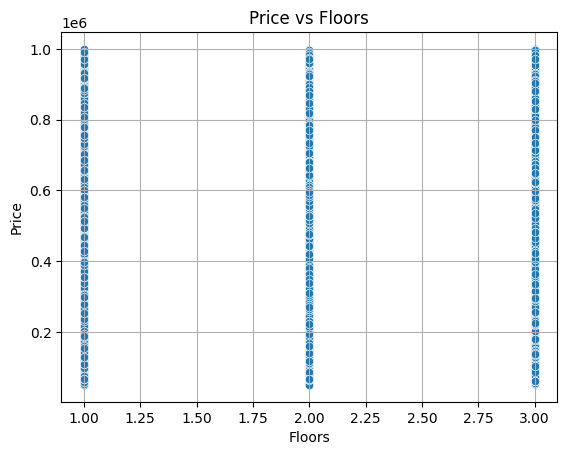

In [ ]:
# Scattar Plot to assess the relationship between Floor and Target variable Price
sns.scatterplot(x='Floors', y='Price', data=data)
plt.title("Price vs Floors")
plt.grid(True)
plt.show()

## Model Training and Evaluation

**Train Test Split
 The dataset is split into training and testing sets with 80% of the data for training and 20% for testing to evaluate generalization.

**Model Training and Evaluation
We train a regression model (Linear Regression) and evaluate it using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


In [165]:
# Split features and target
x = data.drop('Price', axis=1)
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [166]:
# Linear Regression Model
Lin_Regression=LinearRegression()
Lin_Regression.fit(X_train,y_train)
Lin_Regression_Prediction=Lin_Regression.predict(X_test)

In [ ]:
# # GradientBoostingRegressor Model
# GB_Regressor=GradientBoostingRegressor(random_state=42)
# GB_Regressor.fit(X_train,y_train)
# GB_Regressor_Prediction=GB_Regressor.predict(X_test)

In [168]:
print("Linear Regression MAE:", mean_absolute_error(y_test, Lin_Regression_Prediction))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, Lin_Regression_Prediction)))

Linear Regression MAE: 244419.99901363705
Linear Regression RMSE: 280587.6374016649


In [ ]:
# print("Gradient Boosting MAE:", mean_absolute_error(y_test, GB_Regressor_Prediction))
# print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, GB_Regressor_Prediction)))

Gradient Boosting MAE: 244909.88652959638
Gradient Boosting RMSE: 283523.8808127885


## Visualization of Actual vs Predicted

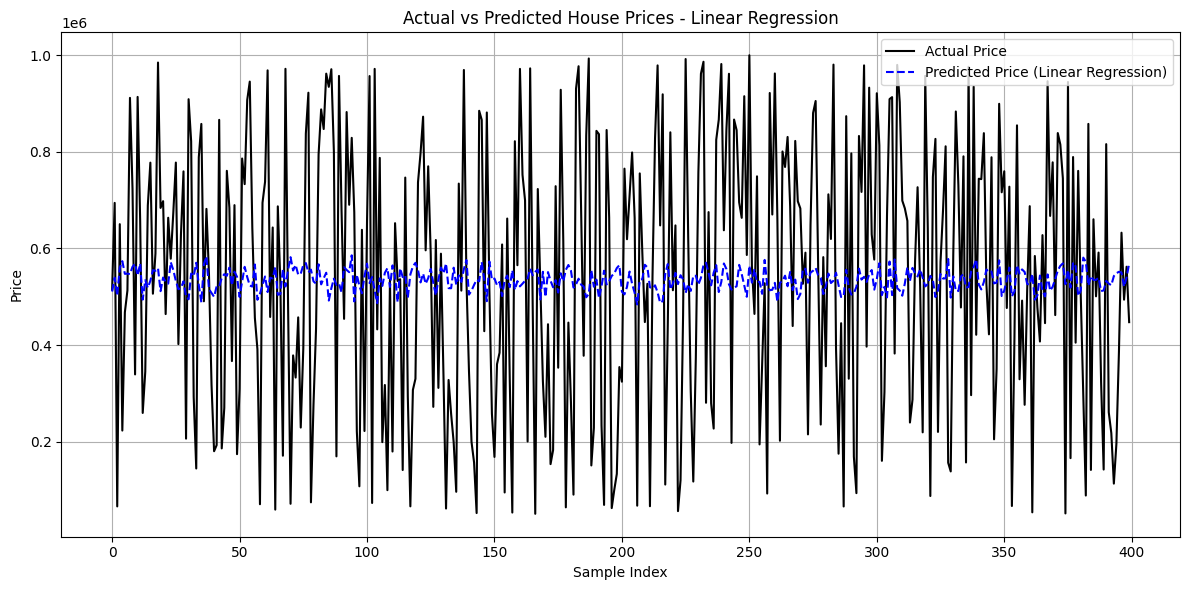

In [ ]:
# Line Graph for Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price', color='black')
plt.plot(Lin_Regression_Prediction, label='Predicted Price (Linear Regression)', linestyle='--', color='blue')
plt.title("Actual vs Predicted House Prices - Linear Regression")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

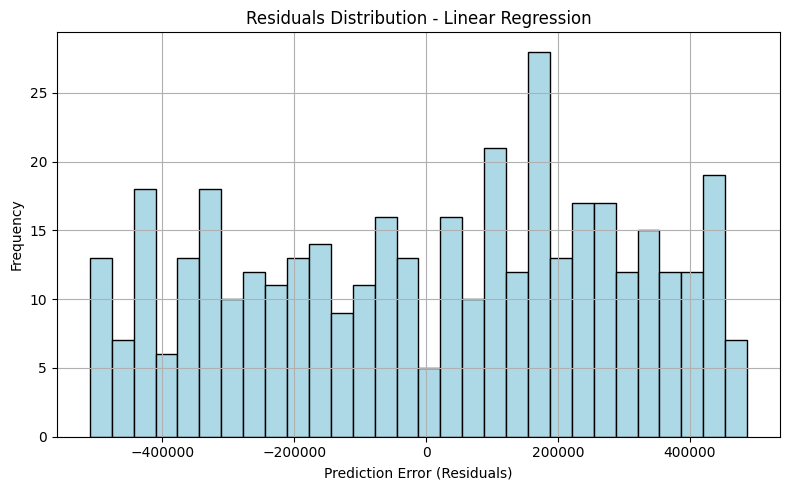

In [ ]:
# Residual Plot
residuals = y_test - Lin_Regression_Prediction

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title("Residuals Distribution - Linear Regression")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()